In [785]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import proj3d
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [763]:
# Magic command to enable inline plotting with Matplotlib
%matplotlib inline

In [764]:
# Loading the csv dataset 
df = pd.read_csv('employee_data.csv')
df.head

<bound method NDFrame.head of       ID Gender  Experience (Years)                      Position  Salary
0      1      F                   4               DevOps Engineer  109976
1      2      M                   6               DevOps Engineer  120088
2      3      M                  17                 Web Developer  181301
3      4      M                   7         Systems Administrator   77530
4      5      F                  13         Systems Administrator  152397
..   ...    ...                 ...                           ...     ...
395  396      F                  19     Cloud Solutions Architect  236045
396  397      F                  20                 Web Developer  182770
397  398      F                   9         Network Administrator   85550
398  399      M                  18  Database Administrator (DBA)  129996
399  400      F                  11           IT Security Analyst  169058

[400 rows x 5 columns]>

In [765]:
# Printing the datatypes of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [766]:
# Printing the unique values in the Position Column
unique_Positions = df['Position'].unique()
unique_Positions

array(['DevOps Engineer', 'Web Developer', 'Systems Administrator',
       'IT Manager', 'Network Administrator',
       'Database Administrator (DBA)', 'IT Security Analyst',
       'Software Engineer', 'IT Support Specialist', 'Systems Analyst',
       'Cloud Solutions Architect'], dtype=object)

In [767]:
# Printing the sum of null values present in variables
df.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [768]:
# Printing the duplicated values present(if any) in variables
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [769]:
# Splitting the testing and training sets
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Salary']),df['Salary'],
                                                test_size=0.2)
X_train
y_train

331    214420
135    109928
54     143412
365     78440
94     150869
        ...  
48     130119
46     114166
218    149970
278    102541
206    142031
Name: Salary, Length: 320, dtype: int64

In [770]:
# Applying Column Transformer to Variables
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['IT Support Specialist', 'Web Developer', 'Systems Administrator', 'Network Administrator', 'Database Administrator (DBA)', 'Systems Analyst', 'IT Security Analyst', 'DevOps Engineer', 'Software Engineer', 'IT Manager', 'Cloud Solutions Architect']]),['Position']),
    ('tnf2',OneHotEncoder(sparse_output=False,drop='first'),['Gender'])
],remainder='passthrough')

In [771]:
# Applying the Column Transform to dataset
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.fit_transform(X_test)

# Check the shape of the transformed data
print(transformed_X_train.shape)
print(transformed_X_test.shape)

(320, 4)
(80, 4)


In [772]:
# Applying Standard Scaler to transformed datasets
scaler = StandardScaler()

# Fitting the scaler to the train set, so that it will learn the parameters
scaler.fit(transformed_X_train)

# Transform the train and test sets 
X_train_scaled = scaler.transform(transformed_X_train)
X_test_scaled = scaler.transform(transformed_X_test)
X_train_scaled

array([[-0.35780705,  0.98142253,  1.12272514,  1.68189042],
       [-0.35780705, -1.01892912, -0.545655  , -1.13073912],
       [ 1.26398127, -1.01892912, -1.23513863,  0.35830005],
       ...,
       [ 0.29090828, -1.01892912,  0.16085291,  0.19285125],
       [-0.03344938, -1.01892912,  0.67158153, -1.62708551],
       [ 0.29090828, -1.01892912,  0.05870719, -0.13804634]])

In [773]:
# Create DataFrames with the transformed data and new column names
scaled_X_train = pd.DataFrame(X_train_scaled)
scaled_X_test = pd.DataFrame(X_test_scaled)

# Check the shape of the transformed data
print(scaled_X_train.shape)
print(scaled_X_test.shape)

(320, 4)
(80, 4)


In [774]:
# Printing column names with their indexing
for idx, col in enumerate(scaled_X_train.columns):
    print(f"Index {idx}: Column name '{col}'")

Index 0: Column name '0'
Index 1: Column name '1'
Index 2: Column name '2'
Index 3: Column name '3'


In [775]:
# Getting the original column names from X_train, X_test
Original_columns = X_train.columns.tolist()
original_columns = X_test.columns.tolist()


# Assigning these column names to scaled_X_train, X_test
scaled_X_train.columns = Original_columns
scaled_X_test.columns = original_columns
scaled_X_test

,ID,Gender,Experience (Years),Position
0,-1.655238,0.981423,-0.843580,-0.965290
1,0.939624,-1.018929,0.186389,-1.627086
2,-0.033449,0.981423,0.697118,-1.296188
3,0.939624,0.981423,-1.388357,0.689198
4,-0.357807,-1.018929,0.518363,-1.627086
...,...,...,...,...
75,-1.006522,0.981423,-0.920189,0.854646
76,-0.682165,0.981423,0.552412,0.027402
77,1.263981,0.981423,-1.252163,1.185544
78,-0.357807,0.981423,-1.345796,-1.461637


/home/gaytri/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


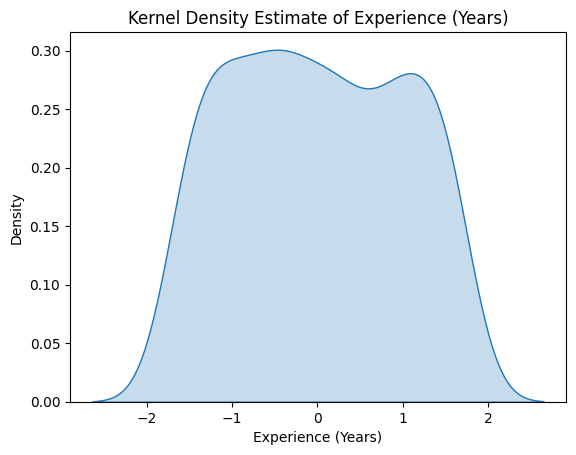

In [776]:
# Distribution plot for Experience (Years) column before power transform
sns.kdeplot(scaled_X_train['Experience (Years)'], fill=True)
plt.title('Kernel Density Estimate of Experience (Years)'),'mode.use_inf_as_na', True
plt.xlabel('Experience (Years)')
plt.ylabel('Density')
plt.show()

/home/gaytri/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


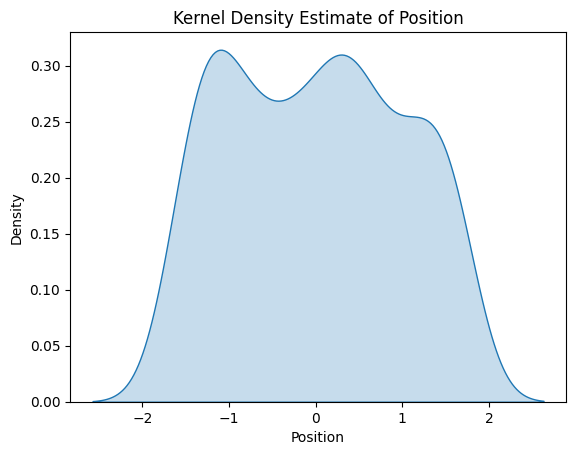

In [777]:
# Distribution plot for Position column before power transform
sns.kdeplot(scaled_X_train['Position'], fill=True)
plt.title('Kernel Density Estimate of Position'),'mode.use_inf_as_na', True
plt.xlabel('Position')
plt.ylabel('Density')
plt.show()

In [778]:
# Select the columns to transform
columns_to_transform = ['Experience (Years)', 'Position']

# Initialize the PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the selected columns
scaled_X_train[columns_to_transform] = pt.fit_transform(scaled_X_train[columns_to_transform])

# Display the transformed DataFrame
print(scaled_X_train)

           ID    Gender  Experience (Years)  Position
0   -0.357807  0.981423            1.118545  1.649217
1   -0.357807 -1.018929           -0.535525 -1.138421
2    1.263981 -1.018929           -1.244105  0.376449
3   -1.006522  0.981423            1.398030 -1.485842
4    0.290908 -1.018929           -0.892796 -0.284816
..        ...       ...                 ...       ...
315 -1.655238  0.981423           -1.297010  0.859696
316  0.939624 -1.018929           -1.314656 -1.485842
317  0.290908 -1.018929            0.176111  0.213229
318 -0.033449 -1.018929            0.679496 -1.660597
319  0.290908 -1.018929            0.074398 -0.117360

[320 rows x 4 columns]


/home/gaytri/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gaytri/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


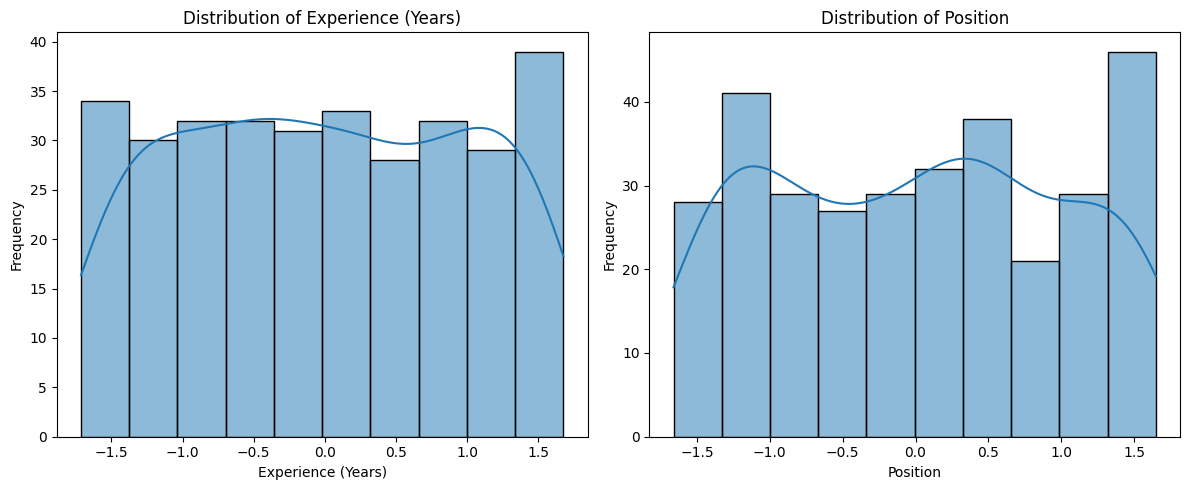

In [779]:
# Plot distribution for 'Experience (Years)' after power transform
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # (rows, cols, panel number)
sns.histplot(scaled_X_train['Experience (Years)'], kde=True)
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Experience (Years)')

# Plot distribution for 'Position' after power transform
plt.subplot(1, 2, 2)
sns.histplot(scaled_X_train['Position'], kde=True)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Distribution of Position')

plt.tight_layout()
plt.show()

<Axes: >

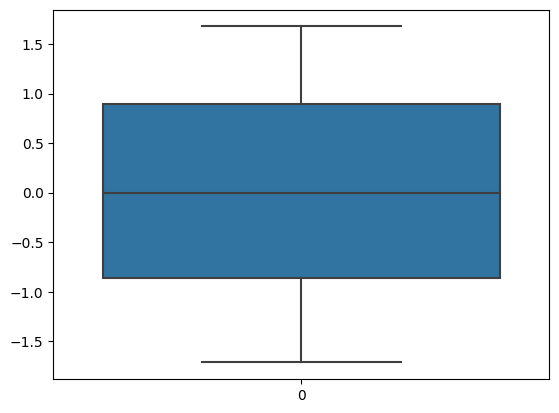

In [780]:
# Creating boxplot to detect the presence of ouliers in variables
sns.boxplot(scaled_X_train['Experience (Years)'])

<Axes: >

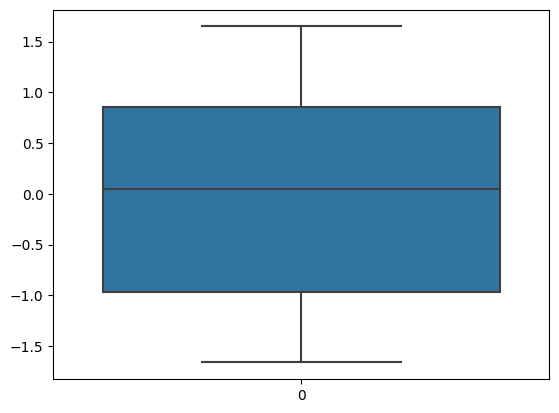

In [781]:
# Creating boxplot to detect the presence of ouliers in variables
sns.boxplot(scaled_X_train['Position'])

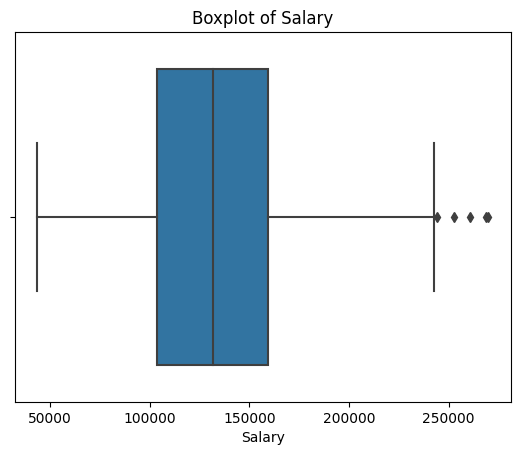

In [782]:
# Boxplot for Salary Column
sns.boxplot(x=y_train)
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

In [783]:
# Capping --> Winsorization (Outlier detection & removal by percentile method) to Salary Column
# Finding lower limit of quartile 
lower_limit = y_train.quantile(0.01)
lower_limit

55276.32

In [784]:
# Finding upper limit of quartile === (Initially tried using 0.99 quartile range but still showing few outliers 
# Then tried using 0.98 and got better results)
upper_limit = y_train.quantile(0.98)
upper_limit

240238.06000000003

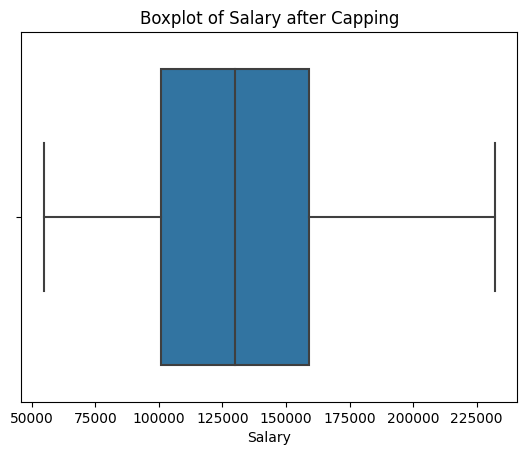

In [757]:
new_df = y_train[(y_train <= 74.78) & (y_train >= 58.13)]
y_train = np.where(y_train >= upper_limit,
        upper_limit,
        np.where(y_train <= lower_limit,
        lower_limit,
        y_train))
sns.boxplot(x=y_train)
plt.title('Boxplot of Salary after Capping')
plt.xlabel('Salary')
plt.show()

/home/gaytri/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


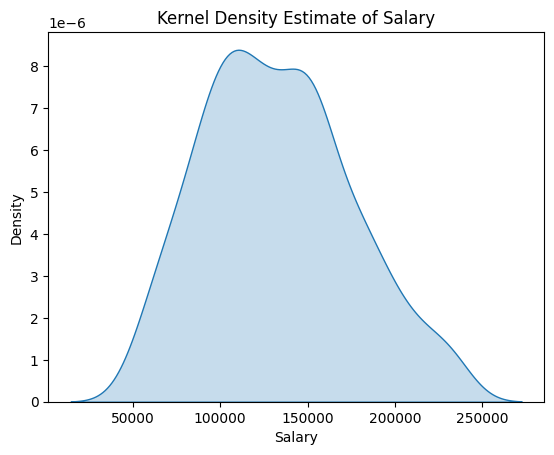

In [753]:
# Distribution plot for Salary column before log transform
sns.kdeplot(y_train, fill=True)
plt.title('Kernel Density Estimate of Salary'),'mode.use_inf_as_na', True
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

/home/gaytri/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


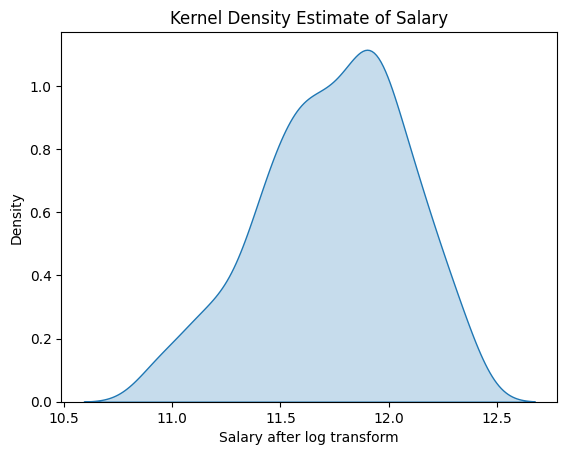

In [754]:
# Apply log transformation
y_train_log = np.log(y_train)

# Distribution plot for Salary column after applying log_transform
sns.kdeplot(y_train_log, fill=True)
plt.title('Kernel Density Estimate of Salary'),'mode.use_inf_as_na', True
plt.xlabel('Salary after log transform')
plt.ylabel('Density')
plt.show()

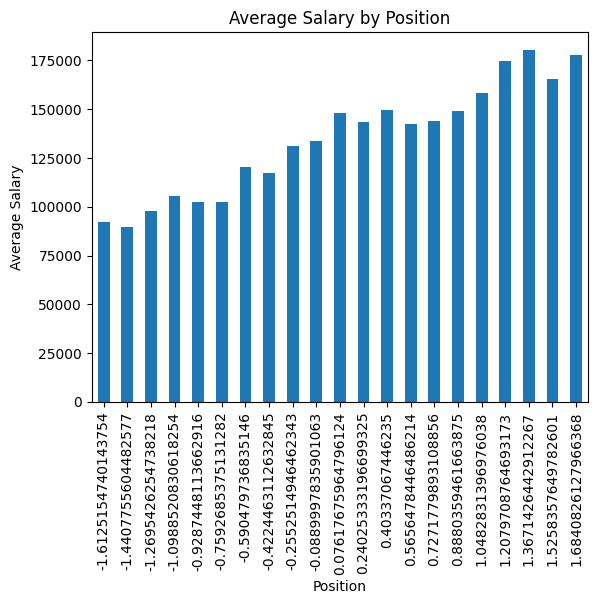

In [755]:
# Calculating and making bar-plot Average Salary by Position
avg_salary_by_position = scaled_X_train.copy()
avg_salary_by_position['Salary'] = y_train
avg_salary_by_position = avg_salary_by_position.groupby('Position')['Salary'].mean()

avg_salary_by_position.plot(kind='bar')
plt.ylabel('Average Salary')
plt.xlabel('Position')
plt.title('Average Salary by Position')
plt.show()

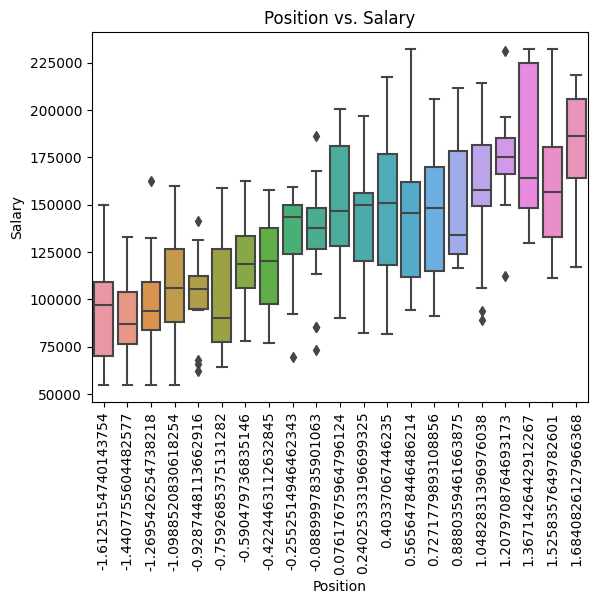

In [756]:
# Box Plot of Salary Distribution by Position
sns.boxplot(x=scaled_X_train['Position'], y=y_train)
plt.title('Position vs. Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.xticks(rotation=90)  # Rotating x labels for better readability
plt.show()

Training Mean Squared Error: 1187557403.41046
Training R-squared: 0.3821496058171603


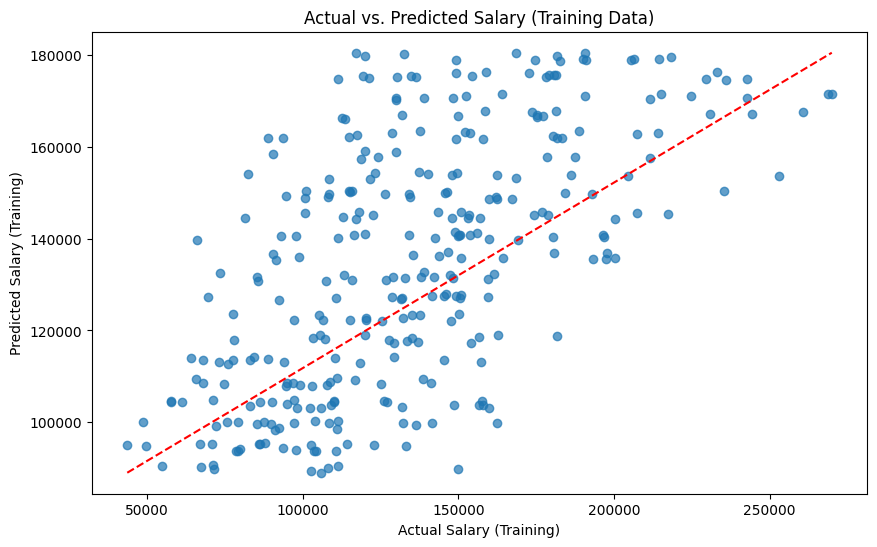

In [789]:
# variable selection
X_train_subset = scaled_X_train[['Experience (Years)', 'Position']]
y_train_subset = y_train

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_subset, y_train_subset)

# Make predictions on the training data
y_train_pred = model.predict(X_train_subset)

# Evaluate the model on training data
mse_train = mean_squared_error(y_train_subset, y_train_pred)
r2_train = r2_score(y_train_subset, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_train_subset, y_train_pred, alpha=0.7)
plt.xlabel('Actual Salary (Training)')
plt.ylabel('Predicted Salary (Training)')
plt.title('Actual vs. Predicted Salary (Training Data)')

# Plot the regression line
plt.plot([y_train_subset.min(), y_train_subset.max()], [y_train_pred.min(), y_train_pred.max()], color='red', linestyle='--')

plt.show()